In [6]:
import os
import numpy as np
from mocap_processing.motion.pfnn import Quaternions, Animation, BVH
#import basecode.basecode.render.gl_render
DATA_FOLDER = "/checkpoint/dgopinath/group1_bvh_updated/"

In [7]:
anim, joints, time_per_frame = BVH.load(os.path.join(DATA_FOLDER, "turn_right_left.bvh"))
global_positions = Animation.transforms_global(anim)
print("Motion dimensions (frames, joints, coordinates) ", anim.positions.shape)
trajectory = anim.positions.reshape(len(global_positions), -1)
print("Total length (in s) ", len(trajectory) * time_per_frame)

Motion dimensions (frames, joints, coordinates)  (4768, 21, 3)
Total length (in s)  39.731744


Number of detected segments  12


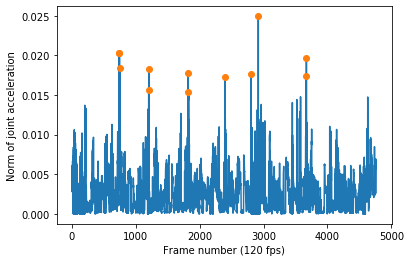

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, argrelextrema

# Assumes you have a trajectory that has axis 0 as time and axis 1 as state dimensions.

acc = np.diff(trajectory,n=2,axis=0)
acc_norm = np.linalg.norm(acc,axis=1)
segs = find_peaks(acc_norm,height=0.015)[0]
sega = argrelextrema(acc_norm, np.greater, order=8)[0]

print("Number of detected segments ", len(segs))

plt.plot(range(len(acc_norm)),acc_norm)
plt.plot(segs,acc_norm[segs],'o')
plt.ylabel("Norm of joint acceleration")
plt.xlabel("Frame number (120 fps)")
plt.savefig("/private/home/dgopinath/data/changepoints.svg", format='svg')
plt.show()